<a href="https://colab.research.google.com/github/igorrzinho/desafio-estagios/blob/main/senha_segura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv("dados_de_vendas.csv")

In [2]:
def verificaTabela(tabela):
  semdados = tabela.isnull().sum()
  print(semdados)
verificaTabela(dados)

ID da Venda       0
Data da Venda     0
Produto           0
Categoria         0
Preço Unitário    0
Quantidade        0
Cidade            0
Estado            0
dtype: int64


In [3]:
# dropna() remove as linhas que tem algum dado nulo
dados_limpos = dados.dropna()
verificaTabela(dados_limpos)
dados = dados_limpos

ID da Venda       0
Data da Venda     0
Produto           0
Categoria         0
Preço Unitário    0
Quantidade        0
Cidade            0
Estado            0
dtype: int64


In [4]:
dados['Data da Venda'] = pd.to_datetime(dados['Data da Venda'])
dados['Data da Venda'] = dados['Data da Venda'].dt.strftime('%d-%m-%Y')
print(dados)

      ID da Venda Data da Venda        Produto Categoria  Preço Unitário  \
0               1    28-05-2024  Camisa Social    Roupas          138.11   
1               2    23-10-2023         Casaco    Roupas          129.28   
2               3    19-08-2023        Moletom    Roupas           91.22   
3               4    18-06-2024  Camisa Social    Roupas          146.40   
4               5    17-03-2024          Tênis  Calçados          186.93   
...           ...           ...            ...       ...             ...   
2995         2996    21-05-2024        Bermuda    Roupas           70.88   
2996         2997    10-01-2024       Camiseta    Roupas           33.86   
2997         2998    01-07-2024         Casaco    Roupas           31.58   
2998         2999    17-12-2023        Vestido    Roupas          173.54   
2999         3000    27-03-2024          Blusa    Roupas           69.19   

      Quantidade          Cidade Estado  
0              3  Rio de Janeiro     RJ  
1  

In [5]:
dados['Valor Total'] = dados['Preço Unitário'] * dados['Quantidade']
print(dados)

      ID da Venda Data da Venda        Produto Categoria  Preço Unitário  \
0               1    28-05-2024  Camisa Social    Roupas          138.11   
1               2    23-10-2023         Casaco    Roupas          129.28   
2               3    19-08-2023        Moletom    Roupas           91.22   
3               4    18-06-2024  Camisa Social    Roupas          146.40   
4               5    17-03-2024          Tênis  Calçados          186.93   
...           ...           ...            ...       ...             ...   
2995         2996    21-05-2024        Bermuda    Roupas           70.88   
2996         2997    10-01-2024       Camiseta    Roupas           33.86   
2997         2998    01-07-2024         Casaco    Roupas           31.58   
2998         2999    17-12-2023        Vestido    Roupas          173.54   
2999         3000    27-03-2024          Blusa    Roupas           69.19   

      Quantidade          Cidade Estado  Valor Total  
0              3  Rio de Janeiro

In [6]:
prod_mais_vend = dados.groupby('Produto')['Quantidade'].sum().idxmax()
print("O produto com mais vendas foi o " + prod_mais_vend)

O produto com mais vendas foi o Moletom


In [7]:
dados['Receita'] = dados['Preço Unitário']*dados['Quantidade']
maior_receita = dados.groupby('Categoria')['Receita'].sum().idxmax()
print("A categoria com a maior receita foi a categoria " + maior_receita)


A categoria com a maior receita foi a categoria Roupas


In [8]:
media_gastos = dados.groupby('Cidade')['Valor Total'].mean()
print('Media de gasto por venda em cada cidade:')
print(media_gastos)

Media de gasto por venda em cada cidade:
Cidade
Belo Horizonte    323.896606
Curitiba          326.229085
Fortaleza         338.713074
Goiânia           334.954984
Manaus            314.797438
Porto Alegre      325.167749
Recife            320.608123
Rio de Janeiro    356.877368
Salvador          312.994141
São Paulo         324.462767
Name: Valor Total, dtype: float64


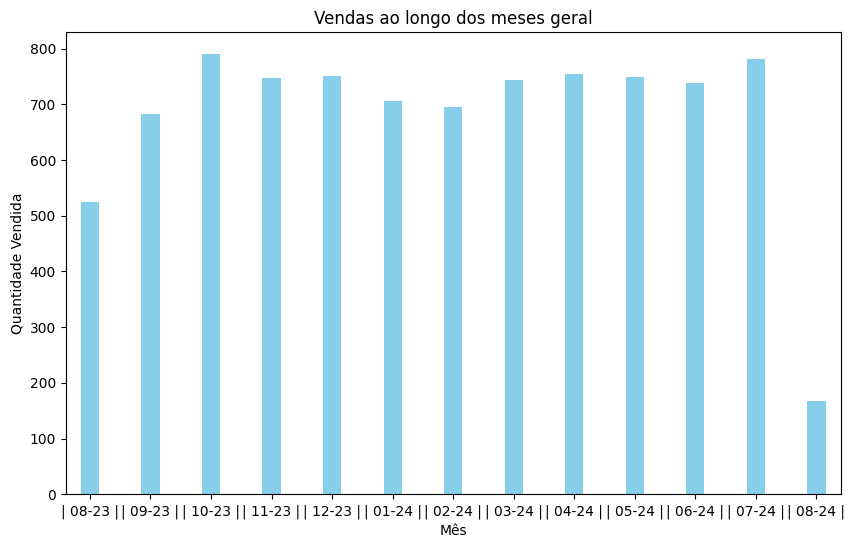

In [33]:
dados['Data da Venda'] = pd.to_datetime(dados['Data da Venda'], format='%d-%m-%Y')
dados['Ano_Mes'] = dados['Data da Venda'].dt.to_period('M')
vendas_mes = dados.groupby('Ano_Mes')["Quantidade"].sum()
plt.figure(figsize=(10,6))
vendas_mes.plot(kind='bar', color='skyblue', width=0.3)
plt.xticks(rotation=45)
x_positions = range(len(vendas_mes))
plt.xticks(ticks=x_positions, labels=[f"| {str(period.month).zfill(2)}-{period.year-2000} |" for period in vendas_mes.index], rotation=45)
plt.title("Vendas ao longo dos meses geral")
plt.xlabel("Mês")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x800 with 0 Axes>

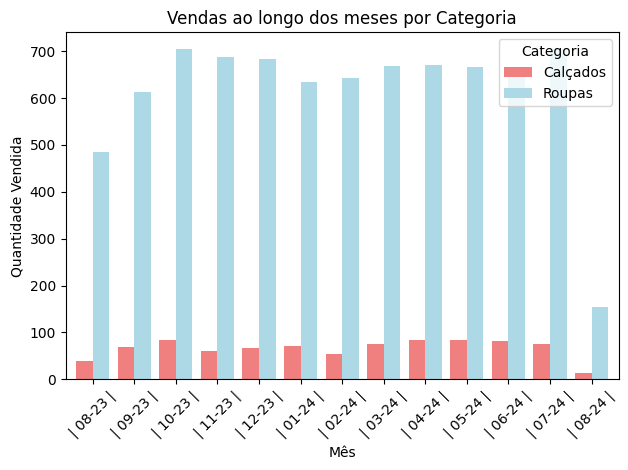

In [38]:
vendas_categoria = dados.groupby(['Ano_Mes', 'Categoria'])["Quantidade"].sum().unstack()
plt.figure(figsize=(10, 8))
vendas_categoria.plot(kind='bar', stacked=False, color=['lightcoral', 'lightblue'], width=0.8)
x_positions = range(len(vendas_categoria))
plt.xticks(ticks=x_positions, labels=[f"| {str(period.month).zfill(2)}-{period.year-2000} |" for period in vendas_categoria.index], rotation=45)
plt.title("Vendas ao longo dos meses por Categoria")
plt.xlabel("Mês")
plt.ylabel("Quantidade Vendida")
plt.tight_layout()
plt.show()


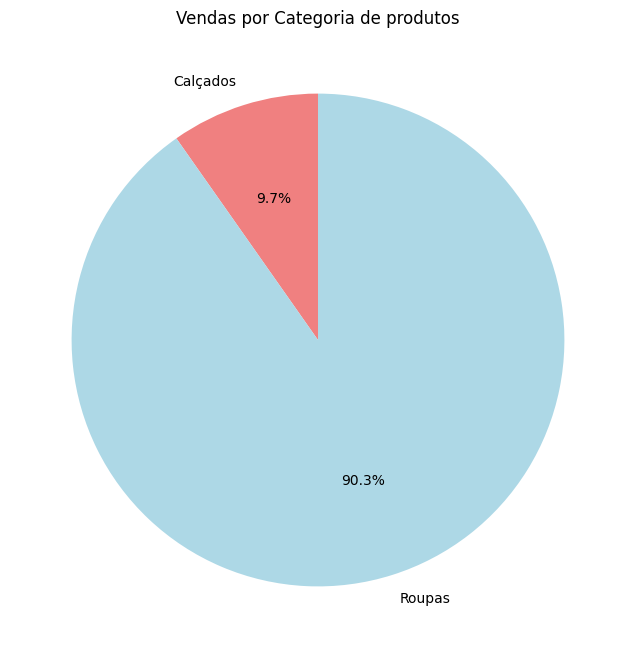

In [ ]:

vendas_cat = dados.groupby('Categoria')["Quantidade"].sum()
plt.figure(figsize=(8,8))
vendas_cat.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title("Vendas por Categoria de produtos")
plt.ylabel("")
plt.show()